In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.arange(10).reshape(2, 5).sum(axis=-1)

array([10, 35])

$ Q \in \mathbb{R}^{q \times d_k}$ and $ K \in \mathbb{R}^{k \times d_k}$ and $ V \in \mathbb{R}^{k \times d_v}$

In [7]:
softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

    
def attention(Q, K, V):
    d_k = Q.shape[-1]
    return softmax((Q @ K.T) / np.sqrt(d_k)) @ V

In [26]:
q = 10
d_k = 100
k = 50
d_v = 50

Q = np.random.normal(0, 1, size=(q, d_k))
K = np.random.normal(0, 1, size=(k, d_k))
V = np.random.normal(0, 1, size=(k, d_v))
out = attention(Q, K, V)

Text(0.5, 1.0, 'Out')

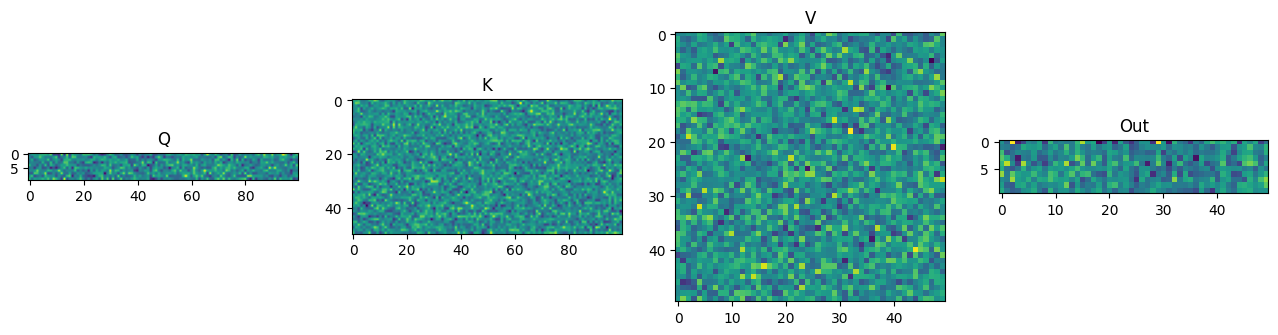

In [9]:
fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(Q)
axs[0].set_title("Q")
axs[1].imshow(K)
axs[1].set_title("K")
axs[2].imshow(V)
axs[2].set_title("V")
axs[3].imshow(out)
axs[3].set_title("Out")

In [24]:
q = 2
d_k = 5
k = 5
d_v = 5

Q = np.ones((q, d_k))
Q[1] = 0
# Q[1,3] = 0
V = np.random.normal(0, 1, size=(k, d_k))
K = np.ones((k, d_v))
K[:, 1] = 0
K[1, :] = 0
out = attention(Q, K, V)
print(V)


[[ 0.58480952 -0.18392861  2.28029222  0.39571522 -0.09342955]
 [-0.24365122 -0.64634736 -0.63653611  1.01420175  0.30193652]
 [ 1.61505051 -0.16805753  0.07964699  2.15354452 -0.11978916]
 [-0.91047763  1.4971375  -0.51634834  0.80322144 -0.00933827]
 [ 1.28282908 -1.24125771 -2.01959946 -1.29295014 -0.20407553]]


Text(0.5, 1.0, 'Out')

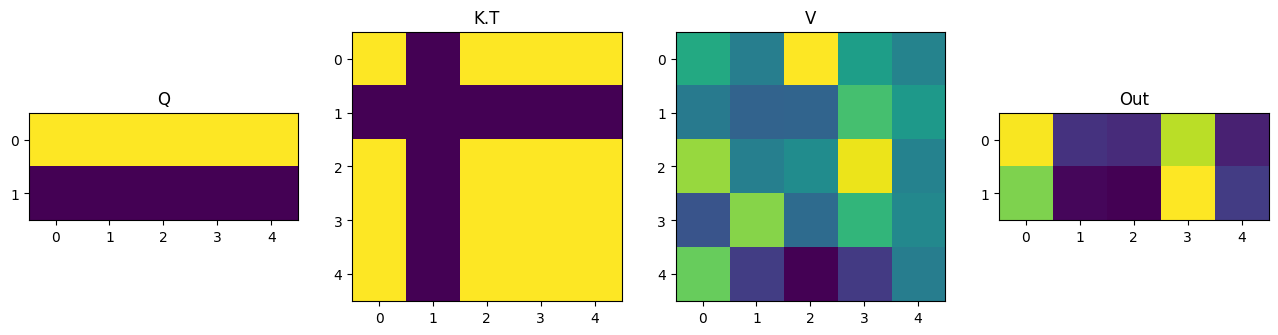

In [25]:
fig, axs = plt.subplots(1,4, figsize=(16,4))
axs[0].imshow(Q)
axs[0].set_title("Q")
axs[1].imshow(K.T)
axs[1].set_title("K.T")
axs[2].imshow(V)
axs[2].set_title("V")
axs[3].imshow(out)
axs[3].set_title("Out")

$ Q \in \mathbb{R}^{q \times d_{model}}$ and $ K \in \mathbb{R}^{k \times d_{model}}$ and $ V \in \mathbb{R}^{k \times d_{model}}$

In [27]:

class Attention:
    def __init__(self, d_k, d_v, d_model):
        self.d_k = d_k
        self.d_v = d_v
        self.d_model = d_model

        self.W_Q = np.random.normal(0, 1, size=(self.d_model, self.d_k))
        self.W_K = np.random.normal(0, 1, size=(self.d_model, self.d_k))
        self.W_V = np.random.normal(0, 1, size=(self.d_model, self.d_v))
        self.W_Q_grad = None
        self.W_K_grad = None
        self.W_V_grad = None
        
    def parameters(self):
        return [self.W_Q, self.W_K, self.W_V]

    def forward(self, Q, K, V):
        Q_project = Q @ self.W_Q
        K_project = K @ self.W_K
        V_project = V @ self.W_V
        return softmax((Q_project @ K_project.T) / np.sqrt(self.d_k)) @ V_project

    def backward(self):
        # We need the derivative
        # softmax(x) * (d_ij  - softmax(x))

        # Do derivative after each W
        pass
        
    def attention(self):
        pass